
# It needs to be updated(Ali)!

##### Sunday, 5 of Feb, 2023---3:12 pm


## Chapter 2: Pretrained networks


### Purpose:
- Running pretrained image-recognition models
- An introduction to GANs and CycleGAN
- Captioning models that can produce text descriptions of images
- Sharing models through Torch Hub

This chapter shows PyTorch in action by running examples of pretrained networks; it demonstrates how to download and run models in PyTorch Hub. Also, we will explore and  learn how to load and run  three popular pretrained models on pyTorch: 
- a model that can label an image according to its content, 
- a model that can fabricate a new image from a real image,
- and a model that can describe the content of an image using proper English sentences.


### A pretrained network that recognizes the subject of an image



A pretrained network is a model that has already been trained on a dataset. Such networks can typically produce useful results immediately after loading the network parameters.
􏰖 By knowing how to use a pretrained model, we can integrate a neural network into a project without having to design or train it.



The pretrained network we’ll explore here was trained on a subset of the ImageNet dataset (http://imagenet.stanford.edu). ImageNet is a very large dataset of over 14 mil- lion images maintained by Stanford University. 

Here, we are going to end up being able to take our own images and feed them into our pretrained model, as pictured in figure 2.2. This will result in a list of predicted labels for that image, which we can then examine to see what the model thinks our image is. Some images will have predictions that are accurate, and others will not!

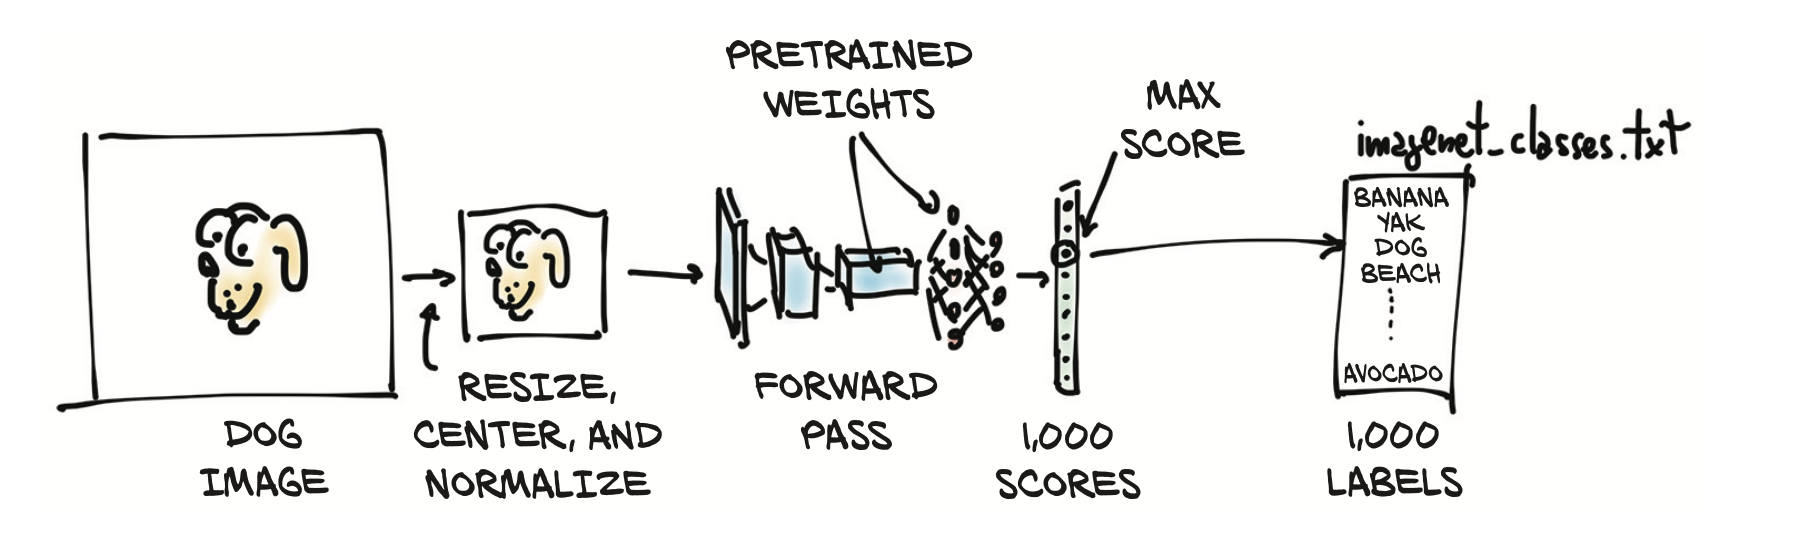

In [1]:
from IPython import display
display.Image("The_inference_process.png")

The input image will first be preprocessed into an instance of the multidimen- sional array class torch.Tensor. It is an RGB image with height and width, so this ten- sor will have three dimensions: the three color channels, and two spatial image dimensions of a specific size. (


Our model will take that processed input image and pass it into the pretrained net- work to obtain scores for each class. The highest score corresponds to the most likely class according to the weights



As discussed, we will now equip ourselves with a network trained on ImageNet. To do so, we’ll take a look at the TorchVision project (https://github.com/pytorch/vision), which contains a few of the best-performing neural network architectures for com- puter vision, such as AlexNet (http://mng.bz/lo6z), ResNet (https://arxiv.org/pdf/ 1512.03385.pdf), and Inception v3 (https://arxiv.org/pdf/1512.00567.pdf).


The capitalized names refer to Python classes that implement a number of popular models. 

The lowercase names are convenience functions that return models instantiated from those classes, sometimes with different parameter sets.

For instance, resnet101 returns an instance of ResNet with 101 layers, resnet18 has 18 layers, and so on.

In [2]:
from torchvision import models  #The predefined models can be found in torchvision.models

In [3]:
 dir(models)  # We can take a look at the actual models:

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights',
 'RegNet_X_1_6GF_Weights',
 'R

### AlexNet

AlexNet was the first convolutional network which used GPU to boost performance. 
It  is conidered as a leading architecture for any object-detection task and may have huge applications in the computer vision sector of artificial intelligence problems.

AlexNet and ResNet are two deep convolutional networks that set new bench- marks for image recognition in the years they were released.




We’ve just run a network that won an image-classification competition in 2015. It learned to recognize our dog from examples of dogs, together with a ton of other real-world subjects

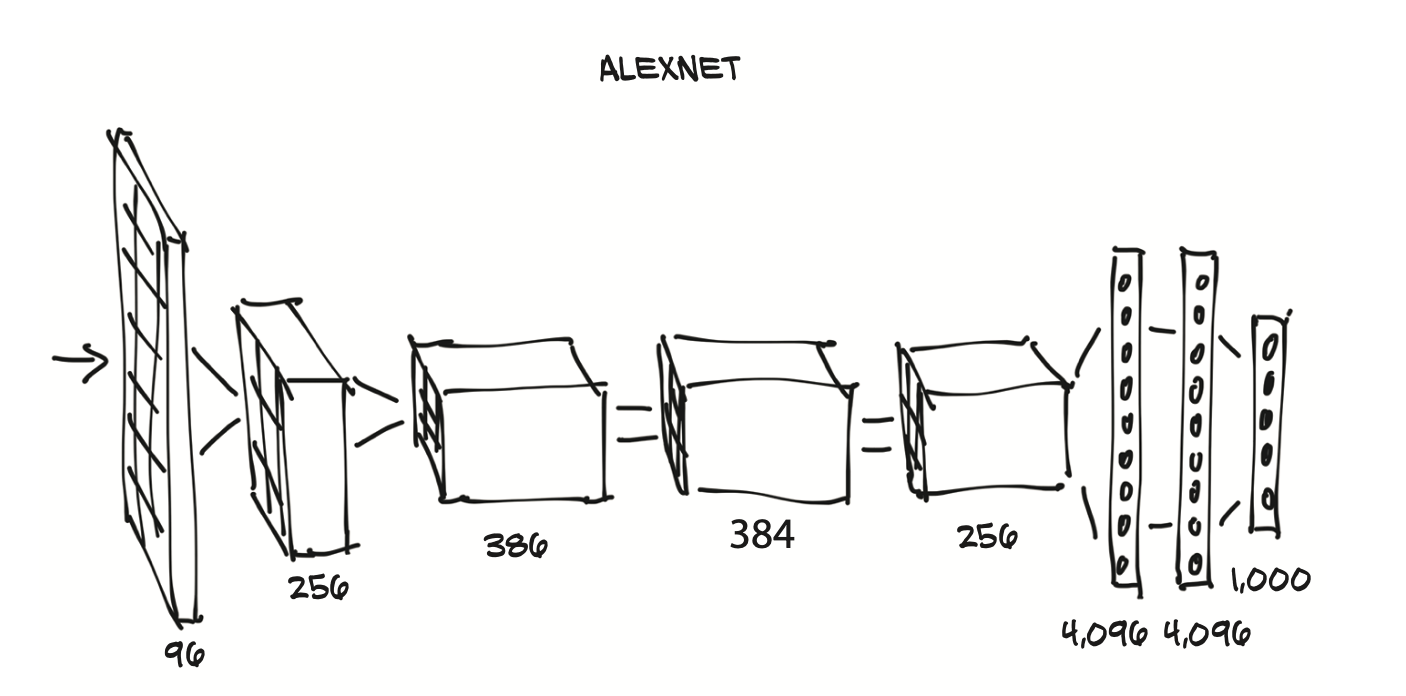

In [4]:
#from IPython import display
#display.Image("Alex_Net.png")

from PIL import Image
img = Image.open("Alex_Net.png")
img

 First, each block consists of a bunch of multiplications and additions, plus a sprinkle of other functions in the output that we’ll discover in chapter 5. We can think of it as a filter—a function that takes one or more images as input and produces other images as output. The way it does so is determined during training, based on the examples it has seen and on the desired outputs for those.
 
 In figure 2.3, input images come in from the left and go through five stacks of filters, each producing a number of output images. After each filter, the images are reduced in size, as annotated. The images produced by the last stack of filters are laid out as a 4,096-element 1D vector and classified to produce 1,000 output probabilities, one for each output class.

In order to run the AlexNet architecture on an input image, we can create an instance of the AlexNet class. This is how it’s done:


At this point, alexnet is an object that can run the AlexNet architecture. It’s not essential for us to understand the details of this architecture for now. For the time being, AlexNet is just

In [5]:
alexnet = models.AlexNet()

We’d need to either train it from scratch or load weights from prior training, which we’ll do now.




#### ResNet

Using the resnet101 function, we’ll now instantiate a 101-layer convolutional neural network

Let’s create an instance of the network now. We’ll pass an argument that will instruct the function to download the weights of resnet101 trained on the ImageNet dataset, with 1.2 million images and 1,000 categories:


While we’re staring at the download progress, we can take a minute to appreciate that resnet101 sports 44.5 million parameters—that’s a lot of parameters to optimize automatically!

In [6]:
resnet = models.resnet101(pretrained=True)

/opt/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 


What we are seeing here is modules, one per line. Note that they have nothing in common with Python modules: they are individual operations, the building blocks of a neural network. They are also called layers in other deep learning frameworks.
If we scroll down, we’ll see a lot of Bottleneck modules repeating one after the other (101 of them!), containing convolutions and other modules. That’s the anat- omy of a typical deep neural network for computer vision: a more or less sequential cascade of filters and nonlinear functions, ending with a layer (fc) producing scores for each of the 1,000 output classes (out_features).

The resnet variable can be called like a function, taking as input one or more images and producing an equal number of scores for each of the 1,000 ImageNet classes. Before we can do that, however, we have to preprocess the input images so they are the right size and so that their values (colors) sit roughly in the same numeri- cal range. In order to do that, the torchvision module provides transforms, which allow us to quickly define pipelines of basic preprocessing functions:


In [8]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

In this case, we defined a preprocess function that will scale the input image to 256 × 256, crop the image to 224 × 224 around the center, transform it to a tensor (a PyTorch multidimensional array: in this case, a 3D array with color, height, and
width), and normalize its RGB (red, green, blue) components so that they have defined means and standard deviations. These need to match what was presented to the network during training, if we want the network to produce meaningful answers. We’ll go into more depth about transforms when we dive into making our own image- recognition models in section 7.1.3.



In [9]:
from PIL import Image
img = Image.open("bobby.jpg")

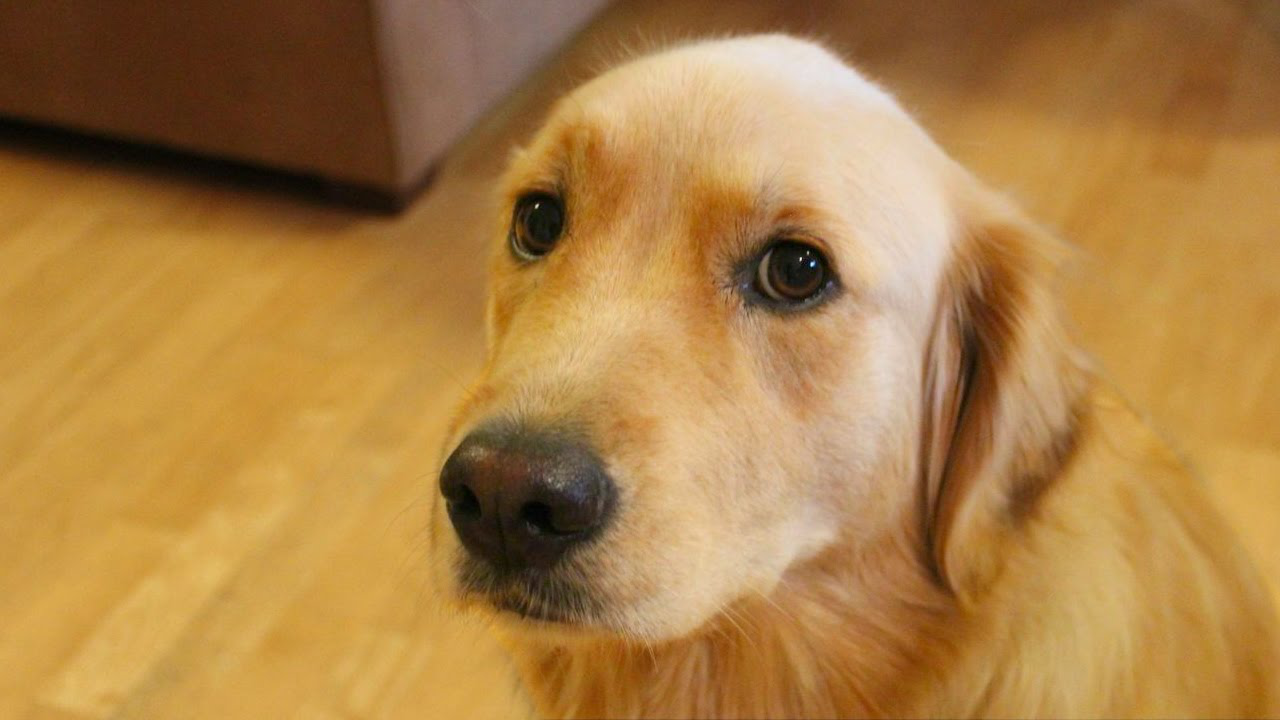

In [10]:
img

Next, we can pass the image through our preprocessing pipeline:

In [11]:
img_t = preprocess(img)

Then we can reshape, crop, and normalize the input tensor in a way that the network expects. We’ll understand more of this in the next two chapters; hold tight for now:

We’re now ready to run our model.

In [12]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

Run!
The process of running a trained model on new data is called inference in deep learn- ing circles. In order to do inference, we need to put the network in eval mode:


In [13]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
out = resnet(batch_t)
out

tensor([[-3.4803e+00, -1.6618e+00, -2.4515e+00, -3.2662e+00, -3.2466e+00,
         -1.3611e+00, -2.0465e+00, -2.5112e+00, -1.3043e+00, -2.8900e+00,
         -1.6862e+00, -1.3055e+00, -2.6129e+00, -2.9645e+00, -2.4300e+00,
         -2.8143e+00, -3.3019e+00, -7.9404e-01, -6.5182e-01, -1.2308e+00,
         -3.0193e+00, -3.9457e+00, -2.2675e+00, -1.0811e+00, -1.0232e+00,
         -1.0442e+00, -3.0918e+00, -2.4613e+00, -2.1964e+00, -3.2354e+00,
         -3.3013e+00, -1.8553e+00, -2.0921e+00, -2.1327e+00, -1.9102e+00,
         -3.2403e+00, -1.1396e+00, -1.0925e+00, -1.2186e+00, -9.3332e-01,
         -4.5093e-01, -1.5489e+00,  1.4161e+00,  1.0871e-01, -1.8442e+00,
         -1.4806e+00,  9.6227e-01, -9.9456e-01, -3.0060e+00, -2.7384e+00,
         -2.5798e+00, -2.0666e+00, -1.8022e+00, -1.9328e+00, -1.7726e+00,
         -1.3041e+00, -4.5848e-01, -2.0537e+00, -3.2804e+00, -5.0451e-01,
         -3.8174e-01, -1.1147e+00, -7.3998e-01, -1.4299e+00, -1.4883e+00,
         -2.1073e+00, -1.7373e+00, -4.

To see the list of predicted labels, we will load a text file listing the labels in the same order they were presented to the network during training, and then we will pick out the label at the index that produced the highest score from the network. Almost all models meant for image recognition have output in a form similar to what we’re about to work with.

Let’s load the file containing the 1,000 labels for the ImageNet dataset classes:

In [15]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

At this point, we need to determine the index corresponding to the maximum score in the out tensor we obtained previously. We can do that using the max function in PyTorch, which outputs the maximum value in a tensor as well as the indices where that maximum value occurred

In [16]:
_, index = torch.max(out, 1)

We can now use the index to access the label. Here, index is not a plain Python num- ber, but a one-element, one-dimensional tensor (specifically, tensor([207])), so we need to get the actual numerical value to use as an index into our labels list using index[0]. We also use torch.nn.functional.softmax (http://mng.bz/BYnq) to nor- malize our outputs to the range [0, 1], and divide by the sum. That gives us something roughly akin to the confidence that the model has in its prediction. In this case, the model is 96% certain that it knows what it’s looking at is a golden retriever:

In [17]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 96.29334259033203)

 ## More to read about: 
 
 
  - #### AlexNet: The First CNN to win Image Net?
 https://www.mygreatlearning.com/blog/alexnet-the-first-cnn-to-win-image-net/#:~:text=AlexNet%20architecture%20consists%20of%205,used%20to%20perform%20max%20pooling.
 
  - #### Pre Trained Models for Image Classification – PyTorch for Beginners
https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/
 
